<a href="https://colab.research.google.com/github/PaulAndre1/PhawAI-s-Projects/blob/main/Proyecto_Netflix_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [1598]:
df = pd.read_csv('/content/netflix_titles.csv')

In [1599]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#Preprocesamiento de Datos

###Tratamiento de Valores Nulos y Preprocesamiento de datos

In [1600]:
def Valores_Nulos(df):
  print("Valores nulos por columna: ")
  for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")
  print("\n")

In [1601]:
Valores_Nulos(df)
print(f"Valores totales: {df.shape}")

Valores nulos por columna: 
show_id: 0
type: 0
title: 0
director: 2634
cast: 825
country: 831
date_added: 10
release_year: 0
rating: 4
duration: 3
listed_in: 0
description: 0


Valores totales: (8807, 12)


Ya que los valores faltantes de 'rating' y 'duration' son muy pocos simplementese llenaran con la moda de su respectiva columna

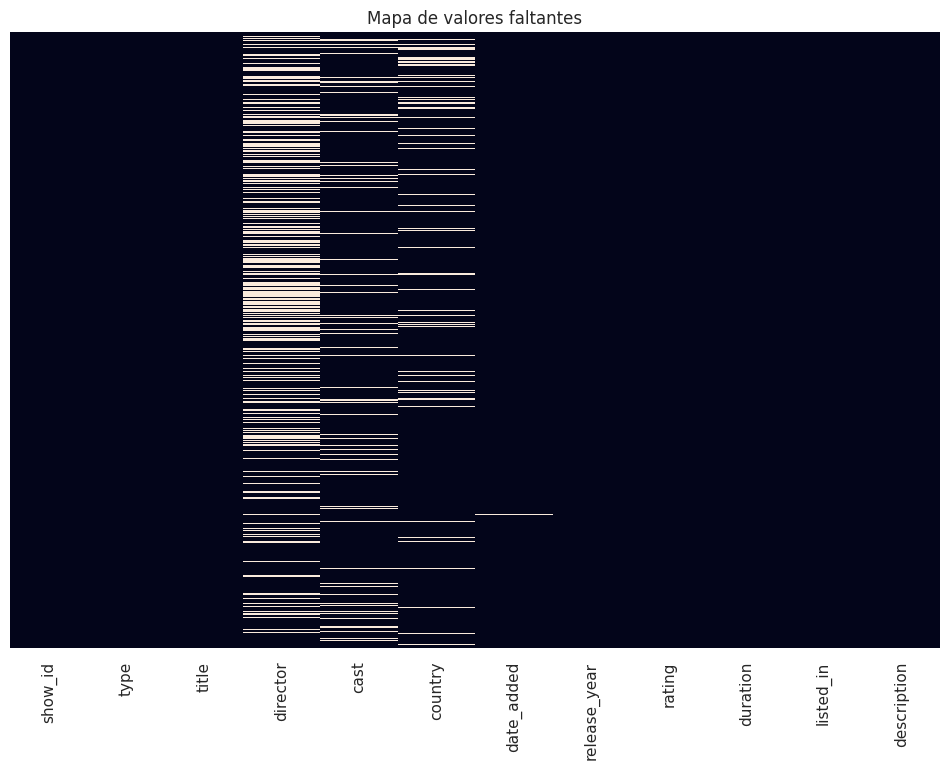

In [1602]:
valores_faltantes = df.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(valores_faltantes, cbar=False, yticklabels=False)
plt.title('Mapa de valores faltantes')
plt.show()

Visualizamos mejor los valores faltantes en todo el dataset de forma grafica

In [1603]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

Podemos notar que la columna 'director' posee cerca del 30% de valores nulos, por lo que es un candidato a ser eliminado, sin embargo, este solo hecho no indica necesariemente su eliminación, para esto se tendrá que hacer un análisis un poco mas profundo.

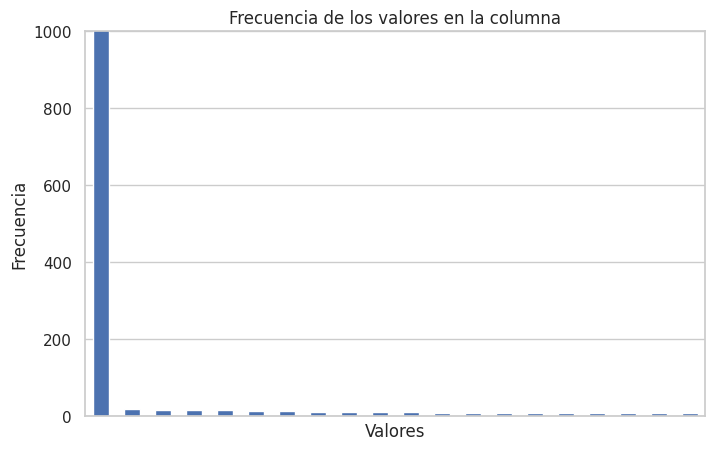

In [1604]:
temp_df = df.copy()
temp_df["director"] = temp_df["director"].fillna("Valor faltante")
#Se hace un grafico de barras para poder apreciar mejor los valores faltantes vs los demas valores

datos = temp_df['director'].value_counts().head(20)

plt.figure(figsize=(8, 5))
datos.plot(kind='bar')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores en la columna')
plt.xticks(rotation=90)
plt.xticks([])
plt.ylim(0,1000)
plt.show()

Como podemos notar, la mayoria de valores(incluso los que se repiten mas veces) en esta columna se repiten en tal cantidad que las hace infimas con respecto a los valores faltantes, dada esta disperción se toma la decision de eliminar esta columa.

In [1605]:
df = df.drop(columns=['director'])

Además de eliminar la columna 'director', tabien eliminamos la columna 'show_id', ya que sacando el conteo de valores se tiene que es un valor unico para cada una de las filas, esta columna no nos ayudara en lo absoluto en para el entrenamiento de un modelo

In [1606]:
df = df.drop(columns=['show_id'])

Para el valor de 'cast', vemos que este no tiene tantos valores faltante, sin embargo, son los suficientes como para no eliminarlos y vernos en la necesidad de llenar los valores que faltan

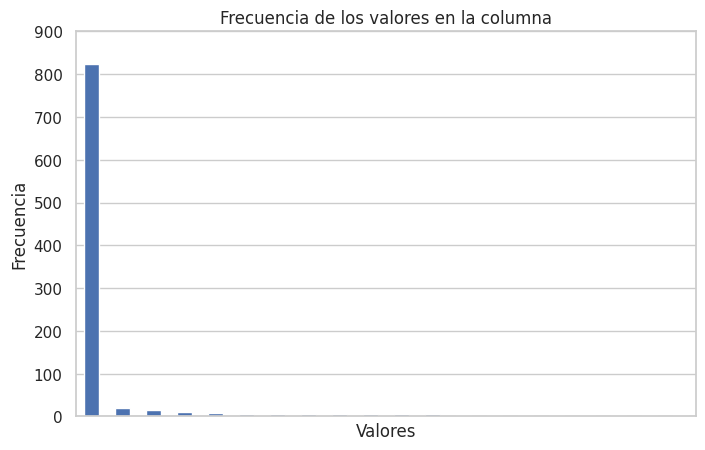

In [1607]:
temp_df = df.copy()
temp_df["cast"] = temp_df["cast"].fillna("Valor faltante")
#Se hace un grafico de barras para poder apreciar mejor los valores faltantes vs los demas valores

datos = temp_df['cast'].value_counts().head(20)

plt.figure(figsize=(8, 5))
datos.plot(kind='bar')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores en la columna')
plt.xticks(rotation=90)
plt.xticks([])
plt.ylim(0,900)
plt.show()

Aunque vemos que hay valores muy dispersos, esto no tiene mucha no significa que esta columna deba ser eliminada, dado que sus valores son varios actores separados por comas ','.

Entonces lo primero que haremos será separar estos valores para tener a todos los actores.

In [1608]:
df['cast'] = df['cast'].str.split(', ')
df['cast']

,cast
0,NaN
1,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,NaN
4,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
...,...
8802,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8803,NaN
8804,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


Ya que tenemos a cada uno de los actores en listas, se calculara el promedio de actores por cada una de las filas para rellenar las filas faltantes con los actores que mas se repiten en todo el dataset de manera aleatoria, se hace de este modo ya que es mas eficiente que solo llenar con la moda de todo el dataset con un solo conjunto de actores, esto provocaria un sesgo ya que como vimos anteriormente los valores son muy dispersos.

In [1609]:
#creamos una copia del dataset para no contar a los valores que no tienen elementos
temp_df = df.copy()
temp_df = temp_df.dropna(subset=['cast'])
tamanio = temp_df['cast'].apply(len).mean()

In [1610]:
#Luego llenamos a los valores faltantes como listas vacias
df['cast'] = df['cast'].apply(lambda x: [] if x is np.NaN else x)
df['cast']

,cast
0,[]
1,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,[]
4,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
...,...
8802,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8803,[]
8804,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


In [1611]:
#Se calculan las apariciones de los actores, para usarlos como probabilidades
actores_populares = df.explode('cast')['cast'].value_counts()
dict_actores_pupulares = dict(actores_populares)
total = sum(dict_actores_pupulares.values())
dict_actores_pupulares = {key : probabilities/total for key, probabilities in dict_actores_pupulares.items()}

In [1612]:
#Con las probabilidades obtenidas creamos una funcion para llenar las listas vacias de nuestro dataset con los actores mas populares
#segun su probabilidad y la cantidad de actores promedio de todo el dataset
def llenar_listas_vacias(L = []):
  if len(L) != 0:
    return L

  elementos = list(dict_actores_pupulares.keys())
  pesos = list(dict_actores_pupulares.values())
  L = random.choices(elementos, weights=pesos, k=int(tamanio))
  return L

In [1613]:
old_df = df.copy()['cast']
old_df = df.dropna(subset=['cast'])
df['cast'] = df['cast'].apply(llenar_listas_vacias)
df['cast']

,cast
0,"[Elten Ting, Ian McElhinney, Luis Guzmán, Push..."
1,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,"[Pål Sverre Hagen, Joshua Ang, Ferenc Lengyel,..."
4,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
...,...
8802,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ..."
8803,"[Jeremy Ray Taylor, Hirotaka Suzuoki, Mikaela ..."
8804,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,..."
8805,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M..."


In [1614]:
old_actores_populares = old_df.explode('cast')['cast'].value_counts().head(30)
old_dict_actores_pupulares = dict(old_actores_populares)
actores_populares = df.explode('cast')['cast'].value_counts().head(30)
dict_actores_pupulares = dict(actores_populares)

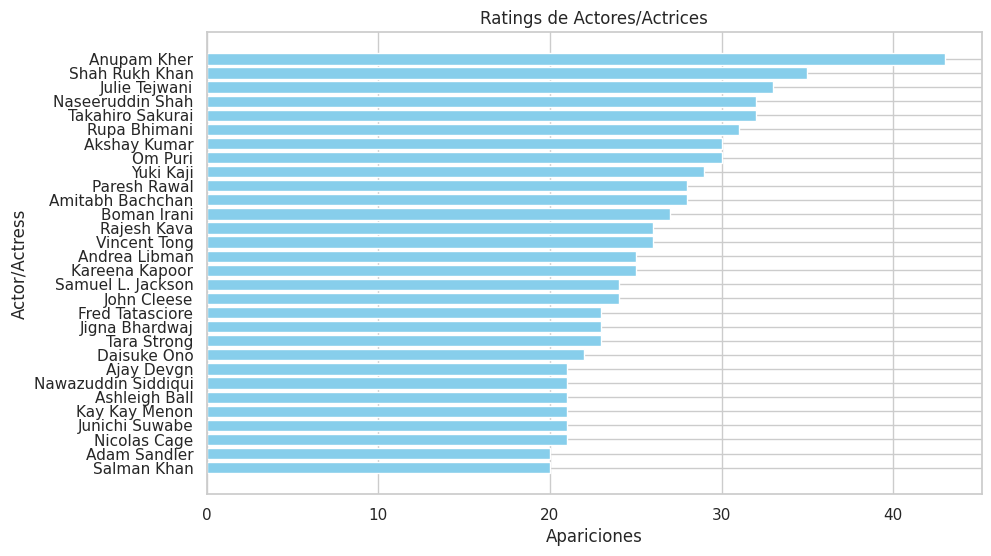

In [1615]:
actores = list(old_dict_actores_pupulares.keys())
apariciones = list(old_dict_actores_pupulares.values())

plt.figure(figsize=(10, 6))
plt.barh(actores, apariciones, color='skyblue')
plt.xlabel('Apariciones')
plt.ylabel('Actor/Actress')
plt.title('Ratings de Actores/Actrices')
plt.gca().invert_yaxis()
plt.show()

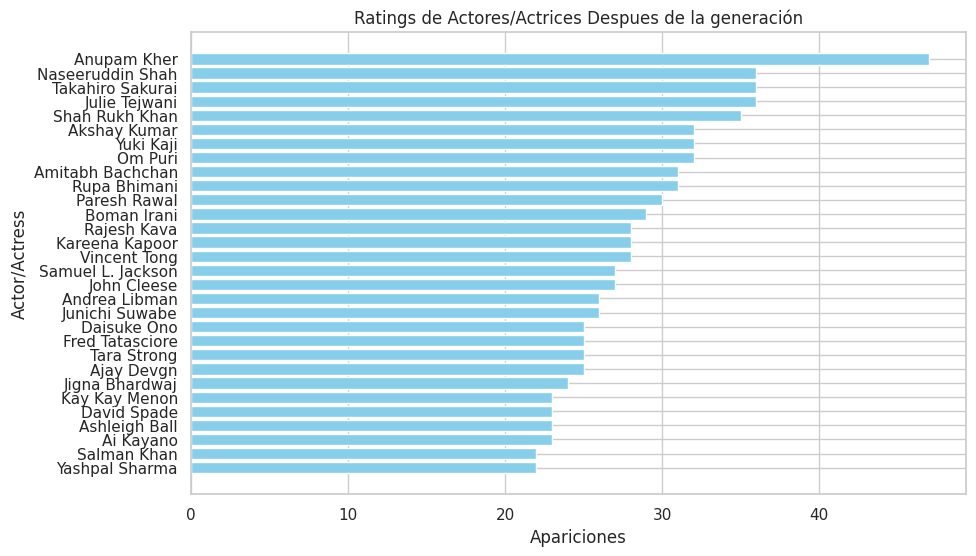

In [1616]:
actores = list(dict_actores_pupulares.keys())
apariciones = list(dict_actores_pupulares.values())

plt.figure(figsize=(10, 6))
plt.barh(actores, apariciones, color='skyblue')
plt.xlabel('Apariciones')
plt.ylabel('Actor/Actress')
plt.title('Ratings de Actores/Actrices Despues de la generación')
plt.gca().invert_yaxis()
plt.show()

La cantidad de apariciones de los atores apenas se ha visto afectada despues del cambio que se hizo

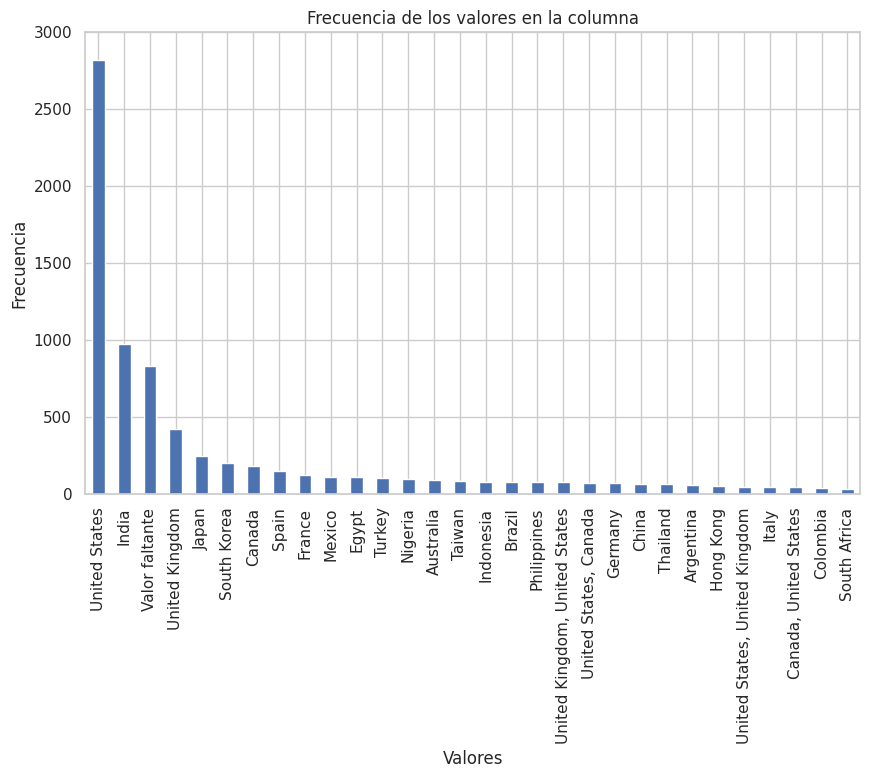

In [1617]:
temp_df = df.copy()
temp_df["country"] = temp_df["country"].fillna("Valor faltante")
#Se hace un grafico de barras para poder apreciar mejor los valores faltantes vs los demas valores

datos = temp_df['country'].value_counts().head(30)

plt.figure(figsize=(10, 6))
datos.plot(kind='bar')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores en la columna')
plt.xticks(rotation=90)
plt.ylim(0,3000)
plt.show()

En este caso, como se tienen valores mucho mas marcados y muchos otros dispersos, la definicion de los valores faltantes por el valor "desconocido" no deberia suponer un sesgo tan grande como si lo haria en "cast" o "director".cuyos maximos conteos no pasaban de 50.

In [1618]:
df['country'] = df['country'].fillna("Desconocido")

In [1619]:
#Al igual que con los actores en algunos casos observamos que hay varios paises en una fila
#por lo que se pondran en listas de 1 a varios elementos
df['country'] = df['country'].str.split(', ')
df['country'].head(10)

,country
0,[United States]
1,[South Africa]
2,[Desconocido]
3,[Desconocido]
4,[India]
5,[Desconocido]
6,[Desconocido]
7,"[United States, Ghana, Burkina Faso, United Ki..."
8,[United Kingdom]
9,[United States]


In [1620]:
#Se contean los paises para tener una mejor referencia
paises_populares = df.explode('country')['country'].value_counts()
dict_paises_populares = dict(paises_populares)

i = 0
for key, value in dict_paises_populares.items():
  i = i + 1
  print(f"{key}: {value}")
  if i == 15:
    break

United States: 3689
India: 1046
Desconocido: 831
United Kingdom: 804
Canada: 445
France: 393
Japan: 318
Spain: 232
South Korea: 231
Germany: 226
Mexico: 169
China: 162
Australia: 160
Egypt: 117
Turkey: 113


In [1621]:
df['date_added'].tolist()[:50]

['September 25, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 24, 2021',
 'September 23, 2021',
 'September 23, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 22, 2021',
 'September 21, 2021',
 'September 21, 2021',
 'September 21, 2021',
 'September 21, 2021',
 'September 21, 2021',
 'September 20, 2021',
 'September 19, 2021',
 'September 19, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 17, 2021',
 'September 16, 2021',
 'September 16, 2021',
 'September 16, 2021',
 'September 16, 2021',
 'September 16, 2021',
 'September 16, 2021',
 'September

Para las fechas como podemos observar en este pequeño fragmento de codigo, estan ordenadas de manera que podemos llenar los valores faltantes con fillna(method='ffill')

In [1622]:
df['date_added'] = df['date_added'].fillna(method='ffill')

<ipython-input-1622-099d0962ea58>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [1623]:
Valores_Nulos(df)
print(f"Valores totales: {df.shape}")

Valores nulos por columna: 
type: 0
title: 0
cast: 0
country: 0
date_added: 0
release_year: 0
rating: 0
duration: 0
listed_in: 0
description: 0


Valores totales: (8807, 10)


In [1624]:
df['rating'].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [1625]:
#Valores que no parecen tener relacion con el rating se les reemplzaza por la moda de su respectiva columna
mode_rating = df['rating'].mode()[0]
df.loc[df['rating'] == "74 min", 'rating'] = mode_rating
df.loc[df['rating'] == "84 min", 'rating'] = mode_rating
df.loc[df['rating'] == "66 min", 'rating'] = mode_rating

In [1626]:
df['rating'].value_counts()

,count
rating,
TV-MA,3214
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


Se tranforma la columna "date_added" a formato fecha para posteriormente hacer un analisis mas profundo

In [1627]:
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
df.head(3)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,"[Elten Ting, Ian McElhinney, Luis Guzmán, Push...",[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Desconocido],2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


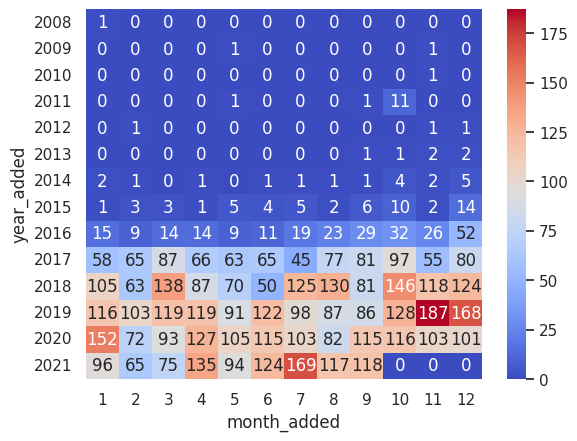

In [1628]:
movie_counts=df[df["type"]=="Movie"].groupby(["year_added", "month_added"])
movie_counts=movie_counts.size().reset_index(name="count")
heatmap_data = movie_counts.pivot_table(values="count",
                                       index="year_added",
                                       columns="month_added",
                                       fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")
plt.show()

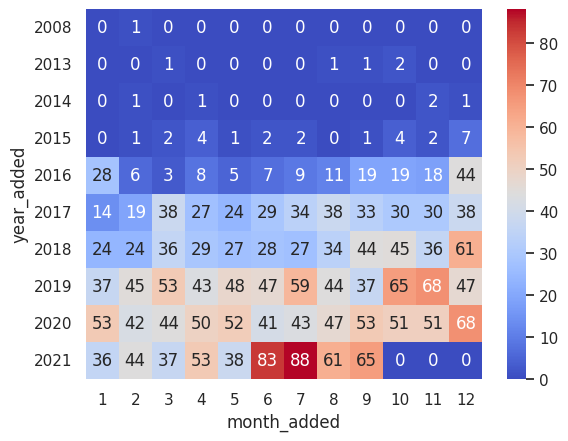

In [1629]:
movie_counts=df[df["type"]=="TV Show"].groupby(["year_added", "month_added"])
movie_counts=movie_counts.size().reset_index(name="count")
heatmap_data = movie_counts.pivot_table(values="count",
                                       index="year_added",
                                       columns="month_added",
                                       fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")
plt.show()

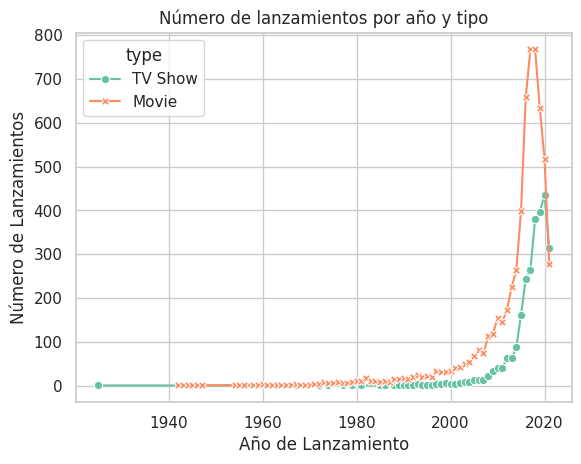

In [1630]:
sns.set_style("whitegrid")

release_counts = df.groupby(["release_year", "type"]).size().reset_index(name="count")
sns.lineplot(data=release_counts, x="release_year", y="count", hue="type",
             palette="Set2", style="type", markers=True, dashes=False)

plt.title("Número de lanzamientos por año y tipo")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Lanzamientos")

plt.show()

Notamos que hay mas lanzamientos de "Movie" que de "TV Show" y esta tendencia se ha ido manteniendo en el tiempo.

Extraer la duración supone un poblema un tanto mas complejo, puesto que para los TVshow y Movies tienen diferente unidad, se podria separar la unidad del número y de esta manera el modelo entrenado podria tener una referencia de lo que se esta tratando, sin embargo, la unidad se veria fuertemente correlacionada con 'type' creando un sesgo.

Convertir las 'season' a unidades y tambien con los 'min' hace que tengamos valores altos para las 'movies' y valores bajos para los 'TV show' sin embargo tratar de inferir la duración de una 'season' en minutos hace que tengamos que basarnos en la suposición de cuanto dura una 'season' siendo que cada capitulo de una serie ronda entre los 20min y 60 min en promedio, además que la diferencia entre la duración seria parecida puesto que una 'TVshow' suele tener un tiempo de duración de mucho mas que 120 min que es lo que en promedio dura una 'movie', hacer esto podría suponer un sesgo.

Por todo lo expuesto se decide simplemente dejar los valores númericos originales sin tratar de tengan la misma unidad

In [1631]:
def extraer_duracion(df):
  num = int(re.search(r'\d+', df).group())
  return num

In [1632]:
df['duration'] = df['duration'].apply(extraer_duracion)



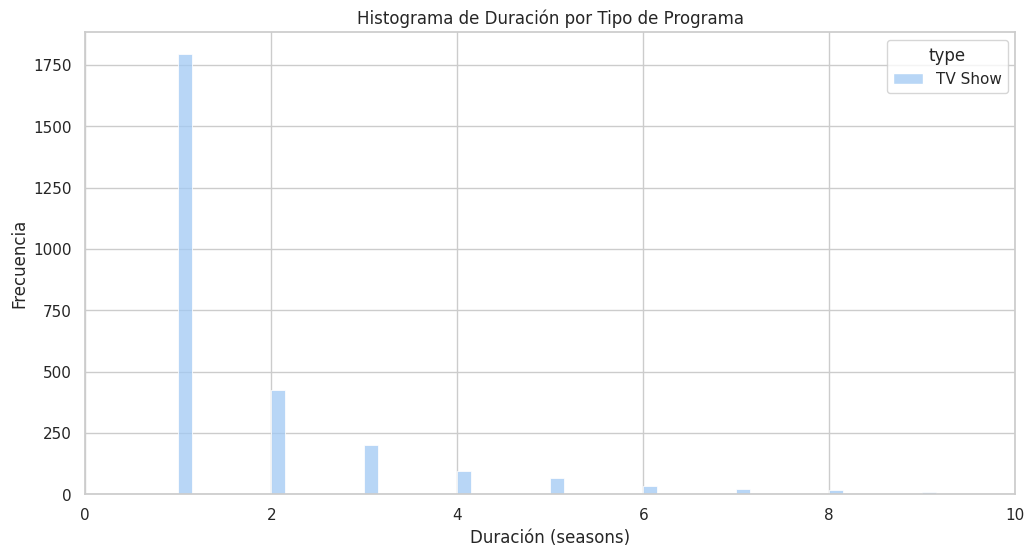

In [1633]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['type'] == 'TV Show'], x='duration', hue='type', multiple='stack', palette='pastel')
plt.xlabel('Duración (seasons)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración por Tipo de Programa')
plt.xlim(0,10)
plt.show()

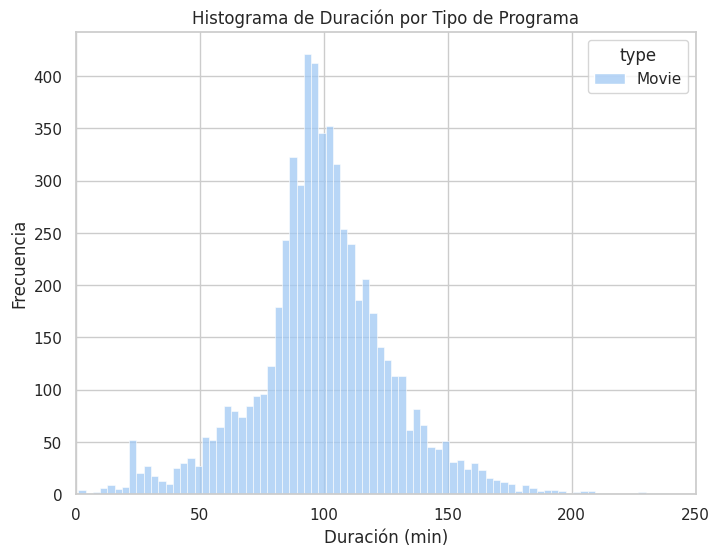

In [1634]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['type'] == 'Movie'], x='duration', hue='type', multiple='stack', palette='pastel')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración por Tipo de Programa')
plt.xlim(0,250)
plt.show()

La duración de las 'movie' suele ser de 100 minutos mientras que las de 'TV Show' suele ser de una temporada

Para el caso de rating se puede establecer una orden en función a la restricción de personas que pueden ver el contenido, dado que las restricciones son muy parecidas para ambos tipos.

In [1635]:
map_rating = {
    'NC-17': 0,   # No apto para menores de 17 anios
    'TV-MA': 0,   # Apto solo para adultos
    'R' : 1,      # Restringido a menores de 17 anios sin acompaniamiento de un adulto
    'TV-14': 2,   # Apto para mayores de 14 anios
    'PG-13': 3,   # Algunos materiales inapropiados para ninios menores de 13 anios
    'TV-PG': 4,   # Se sugiere orientación de los padres
    'PG': 4,      # Se sugiere orientacion de los padres
    'G': 5,       # Apto para todo público
    'TV-G': 5,    # Apto para todo público
    'TV-Y7-FV': 5,# Apto para ninios a partir de 7 anios con violencia no realista
    'TV-Y7': 6,   # Apto para ninios a partir de 7 anios
    'TV-Y': 7,    # Apto para todas las edades
    'NR': 3.5,    # No se clasifico
    'UR': 3.5     # No se clasifico
    }

In [1636]:
df['rating'] = df['rating'].map(map_rating)

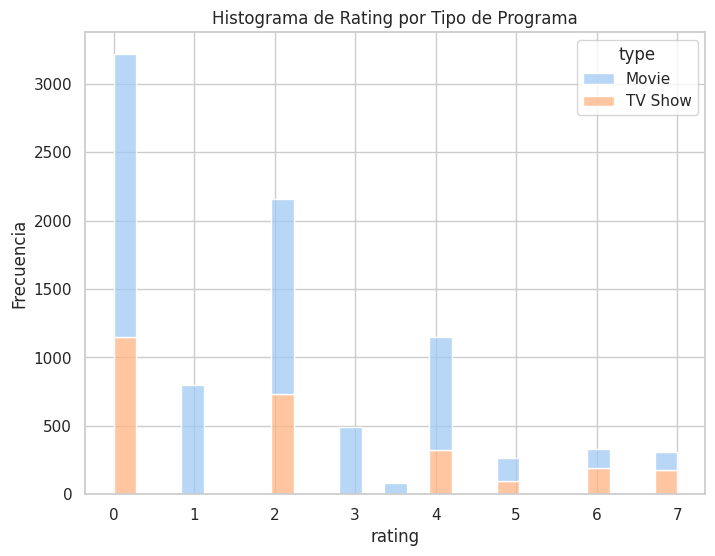

In [1637]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', hue='type', multiple='stack', palette='pastel')
plt.xlabel('rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de Rating por Tipo de Programa')
plt.show()

Como podemos observar, la mayoria de series y peliculas de nuestro dataset no tienen restricción y esta va bajando a medida que se vuelve mas restrictiva

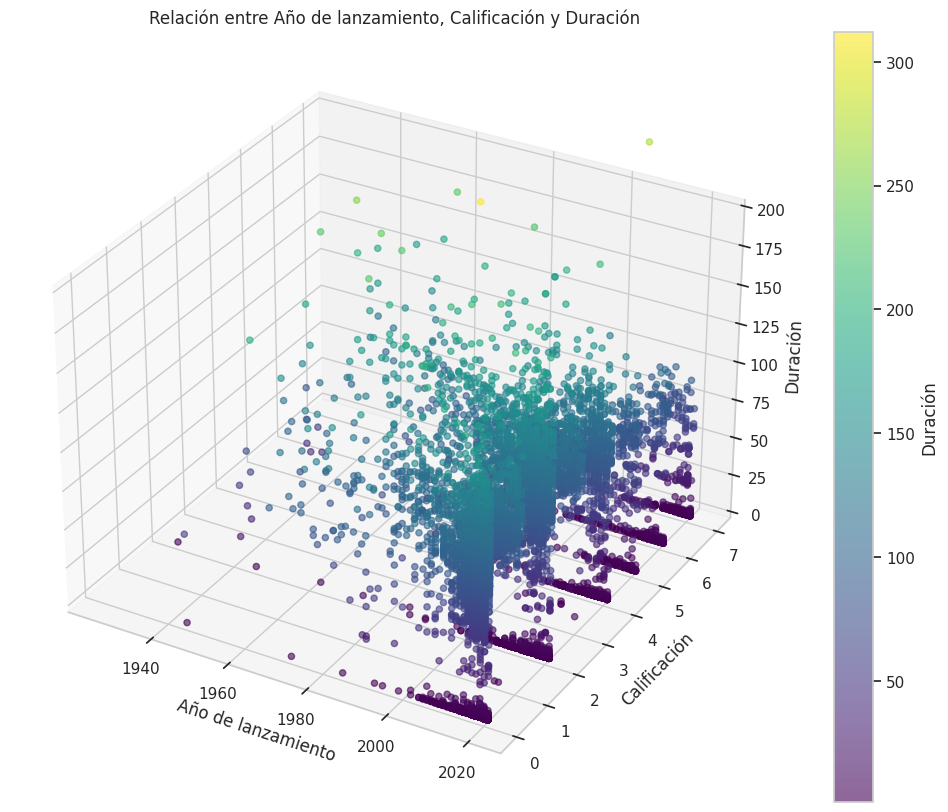

In [1638]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['release_year'],
                     df['rating'],
                     df['duration'],
                     c=df['duration'],
                     cmap='viridis',
                     alpha=0.6)

ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Calificación')
ax.set_zlabel('Duración')
ax.set_title('Relación entre Año de lanzamiento, Calificación y Duración')
ax.set_zlim(0, 200)
plt.colorbar(scatter, label='Duración')

plt.show()

Podemos notar la diferencia entre las que son "Movie" y "TV Show" lo que ayudara a nuestro modelo a ser mas preciso, aunque aportando coorrelación entre estos dos label, tambien notamos que a medida de que la clasificación es menos restrictiva, hay menos elementos.

Hacemos dos graficas parecidas pero esta vez por separado para "TV Show" y para "Movie"

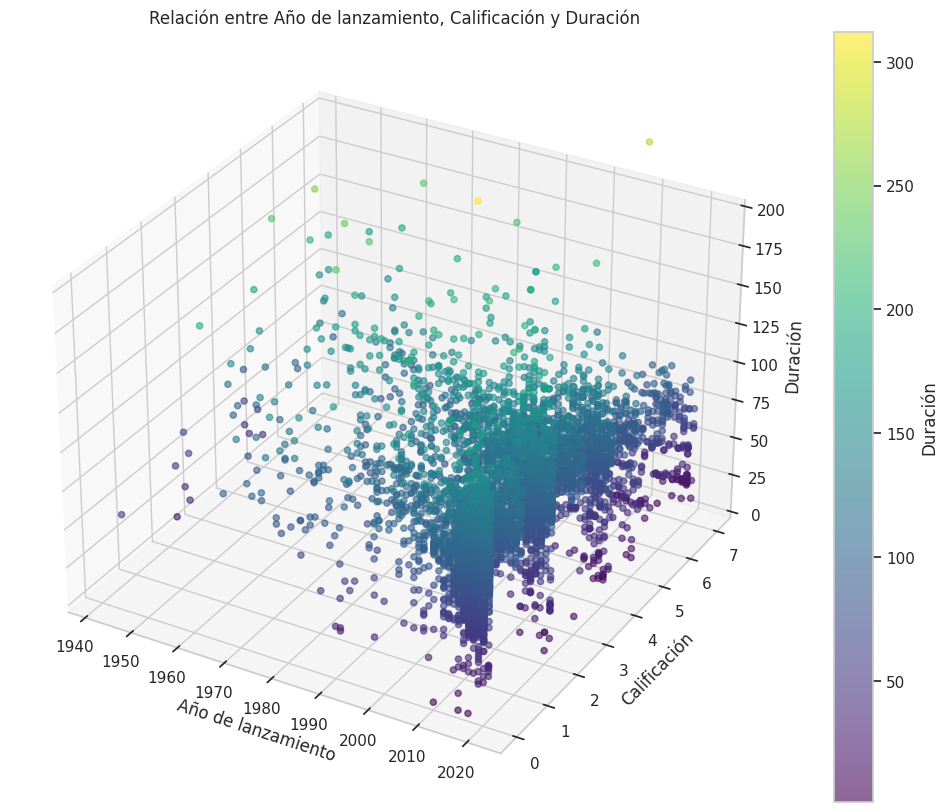

In [1639]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[df['type'] == 'Movie']['release_year'],
                     df[df['type'] == 'Movie']['rating'],
                     df[df['type'] == 'Movie']['duration'],
                     c=df[df['type'] == 'Movie']['duration'],
                     cmap='viridis',
                     alpha=0.6)

ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Calificación')
ax.set_zlabel('Duración')
ax.set_title('Relación entre Año de lanzamiento, Calificación y Duración')
ax.set_zlim(0, 200)

plt.colorbar(scatter, label='Duración')

plt.show()

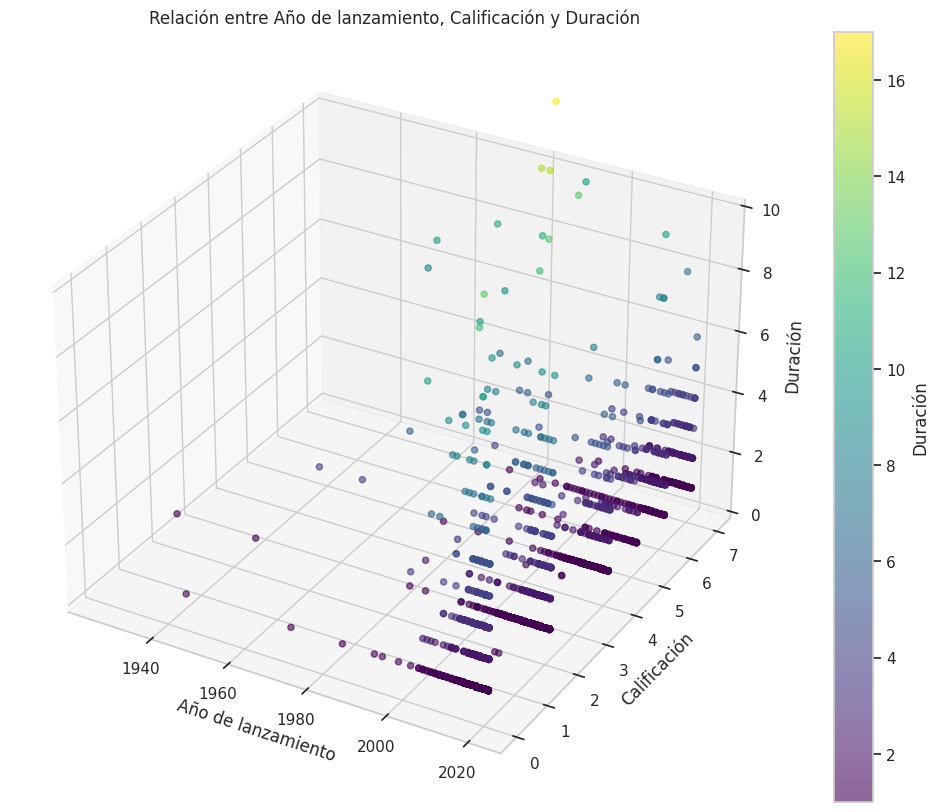

In [1640]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[df['type'] == 'TV Show']['release_year'],
                     df[df['type'] == 'TV Show']['rating'],
                     df[df['type'] == 'TV Show']['duration'],
                     c=df[df['type'] == 'TV Show']['duration'],
                     cmap='viridis',
                     alpha=0.6)

ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Calificación')
ax.set_zlabel('Duración')
ax.set_title('Relación entre Año de lanzamiento, Calificación y Duración')
ax.set_zlim(0, 10)
plt.colorbar(scatter, label='Duración')

plt.show()

En ambos graficos, notamos que a medida que la clasificación es menos restrictiva la duración de "Movie" o "TV Show" es menor en sus respecticas unidades

Además en ambos casos notamos que a medida que el tiempo ha aumentado tanto los "TV Show" y "Movie" han bajado el tiempo de duración

Al igual que para "country" y para "cast" hacemos lo mismo en "listed_in" para obtener los generos

In [1641]:
df['listed_in'] = df['listed_in'].str.split(', ')
generos_populares = df['listed_in'].explode().value_counts().head(20)
dict_generos_populares = dict(generos_populares)

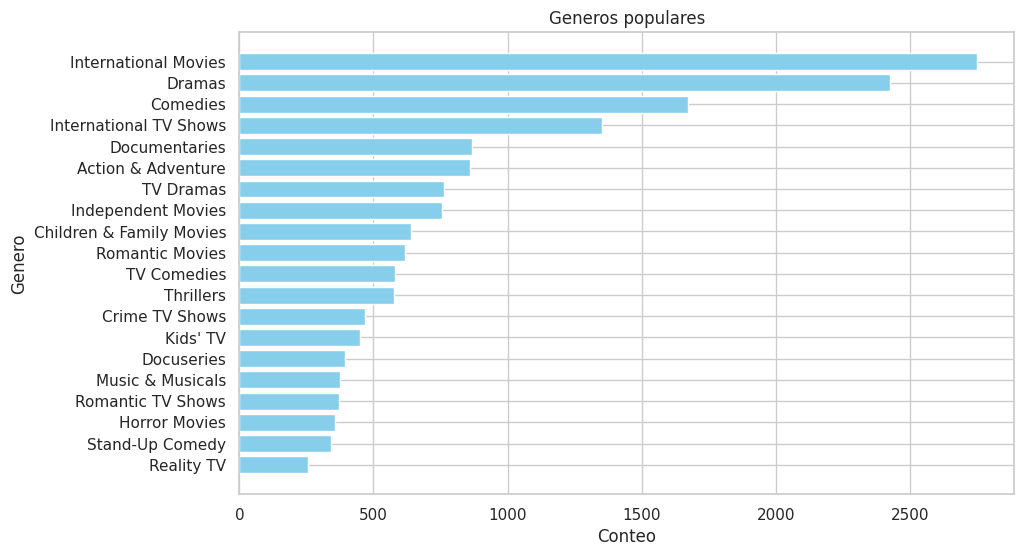

In [1642]:

actores = list(dict_generos_populares.keys())
apariciones = list(dict_generos_populares.values())


plt.figure(figsize=(10, 6))
plt.barh(actores, apariciones, color='skyblue')
plt.xlabel('Conteo')
plt.ylabel('Genero')
plt.title('Generos populares')
plt.gca().invert_yaxis()
plt.show()

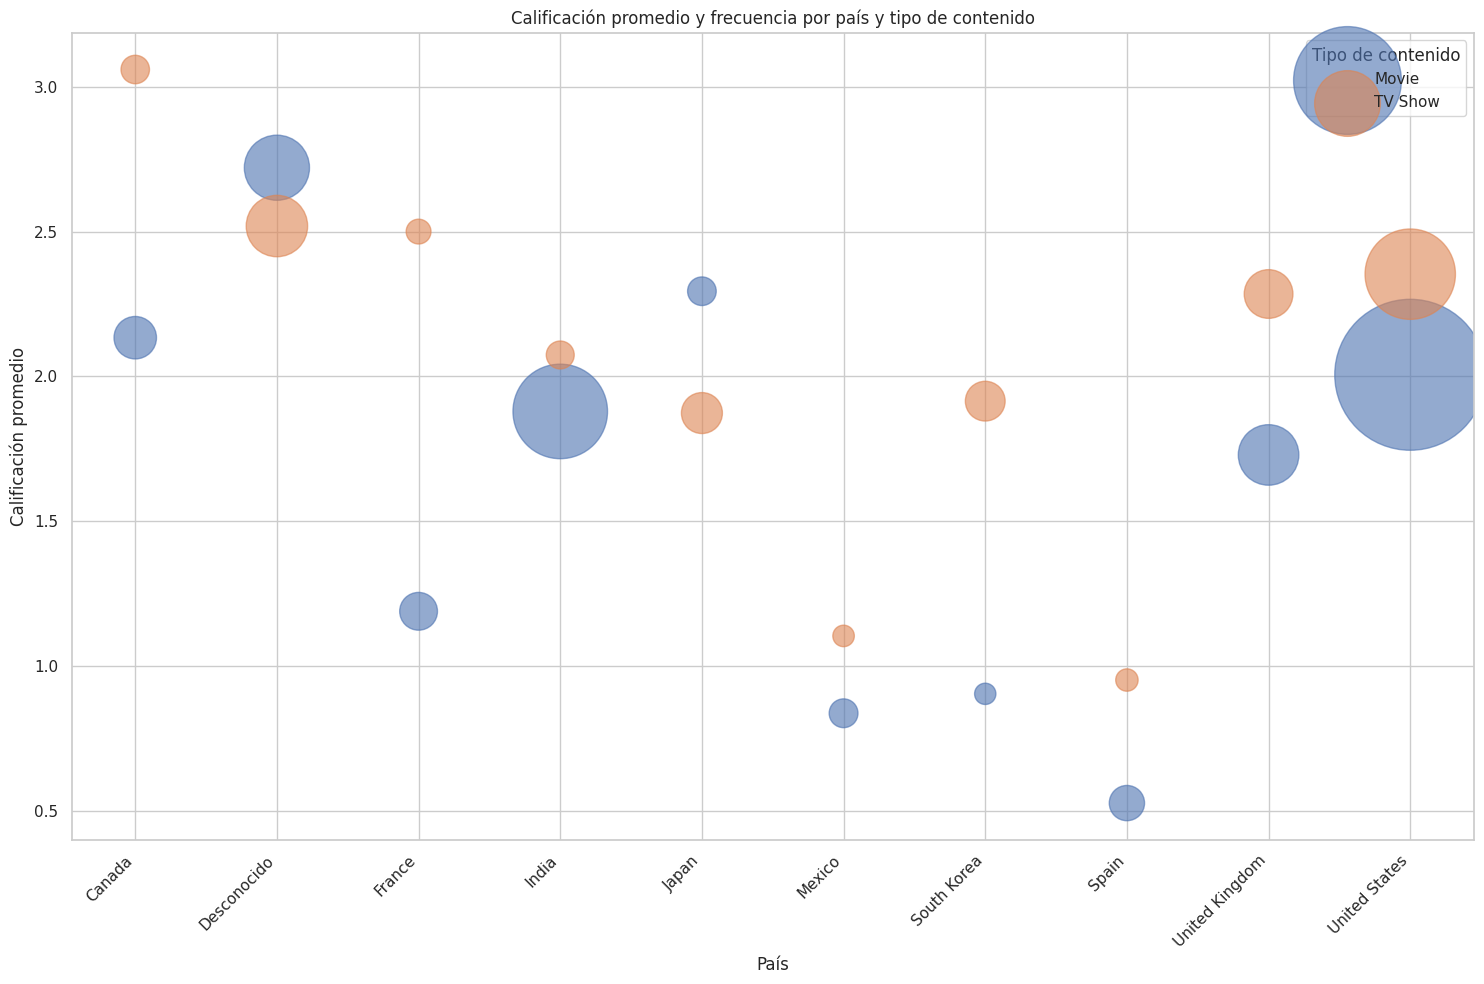

In [1643]:

temp_df = df.copy()
temp_df['first_country'] = temp_df['country'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

top_countries = temp_df['first_country'].value_counts().nlargest(10).index

df_filtered = temp_df[temp_df['first_country'].isin(top_countries)]

avg_ratings = df_filtered.groupby(['first_country', 'type']).agg({'rating': 'mean', 'title': 'count'}).reset_index()
avg_ratings.columns = ['country', 'type', 'avg_rating', 'count']

plt.figure(figsize=(15, 10))

for content_type in ['Movie', 'TV Show']:
    data = avg_ratings[avg_ratings['type'] == content_type]
    plt.scatter(data['country'], data['avg_rating'],
                s=data['count']*5,
                alpha=0.6,
                label=content_type)

plt.title('Calificación promedio y frecuencia por país y tipo de contenido')
plt.xlabel('País')
plt.ylabel('Calificación promedio')
plt.legend(title='Tipo de contenido')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

En este grafico podemos darnos cuenta de que paises como España, Mexico producen mas contenido restrictivo y paises como Canada producen contenido mas general, asi mismo US produce contenido mas variado, y Francia hace peliculas mas restrictivas mientras que sus TV Show no lo son tanto.

In [1644]:
#Resalto que este codigo no es de mi autoria, pero me parecio muy interesante
from textblob import TextBlob
import plotly.express as px

df3 = df[['release_year', 'description']]
df3 = df3.rename(columns={'release_year': 'Release Year', 'description': 'Description'})
for index, row in df3.iterrows():
    d = row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[[index, 2], 'Sentiment'] = sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Count')

df3 = df3[df3['Release Year'] > 2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color="Sentiment", title="Sentiment Analysis of Content on Netflix")
barGraph.show()

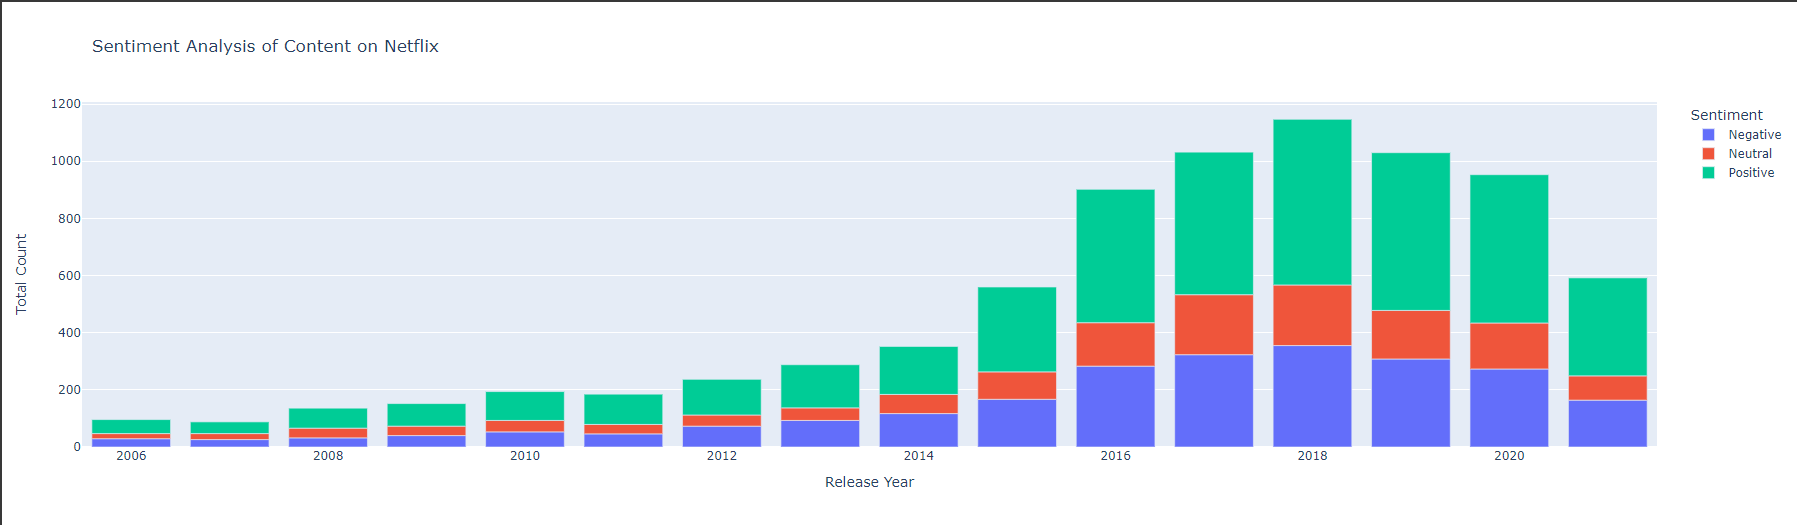

Resalto otra vez que esta parte del codigo no me pertenece, sin embargo su analisis me parecio interesante.

IDEA!: con base en la descripcion se podria poner en el dataset una clasificación ordinal en base al analisis de sentimientos para que nuestro dataset sea mas sencillo y mucho mas entendible.

Sin embargo, es algo que en esta ocación no hare; pero me gustaria mucho hacer la prueba con un modelo precdictivo; en lugar de esto usare estrategias como bag of words y/o vectorización para el dataset final.

###Conversión de los datos a números

Aqui se usa Verctorización ya que el orden y demas carácteristicas deberian ser importantes

In [1645]:
max_features = 10000
sequence_length = 100

temp_df = df.copy()

text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_sequence_length=sequence_length
)


temp_df = temp_df.sample(frac=1).reset_index(drop=True)


text_vectorizer.adapt(temp_df['description'])


def vectorize_text(texts):
    return text_vectorizer(texts)


vectorized_texts = vectorize_text(df['description'])
df['description'] = list(vectorized_texts.numpy())

Aqui se usa Bag of Words ya que el orden y el vocabulario es muy pequeño para ser reelevante

In [1648]:
vocabulary_words_global_countries = []
vocabulary_words_global_cast = []
vocabulary_words_global_listed_in = []
vocabulary_words_global_director = []
def Bag_of_Words(L, vocabulary):
  vocabulary_numbers_local = []
  for item in L:
    if item in vocabulary:
      vocabulary_numbers_local.append(vocabulary.index(item))
    else:
      vocabulary.append(item)
      vocabulary_numbers_local.append(vocabulary.index(item))
  return vocabulary_numbers_local

df['country'] = df['country'].apply(lambda x: Bag_of_Words(x, vocabulary_words_global_countries))
df['cast'] = df['cast'].apply(lambda x: Bag_of_Words(x, vocabulary_words_global_cast))
df['listed_in'] = df['listed_in'].apply(lambda x: Bag_of_Words(x, vocabulary_words_global_listed_in))

Por último se obtienen valores para 'type' sin establecer un orden que podria generar un sesgo

In [1650]:
dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['type'], inplace=True)

Como los indices eran números de manera ascendente, poner los titulos de las peliculas es una mejor opcion y más entendible

In [1652]:
df = df.set_index('title')

In [1653]:
df

,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,type_Movie,type_TV Show
title,,,,,,,,,,,,
Dick Johnson Is Dead,"[0, 1, 2, 3, 4, 5, 6, 7]",[0],2021-09-25,2020,3.0,90,[0],"[18, 10, 71, 3809, 3, 492, 6, 8, 26, 487, 1, 5...",2021,9,True,False
Blood & Water,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",[1],2021-09-24,2021,0.0,2,"[1, 2, 3]","[21, 5725, 436, 27, 2, 346, 2, 5792, 105, 78, ...",2021,9,False,True
Ganglands,"[27, 28, 29, 30, 31, 32, 33, 34, 35]",[2],2021-09-24,2021,0.0,1,"[4, 1, 5]","[4, 316, 8, 33, 17, 2, 234, 174, 587, 1415, 77...",2021,9,False,True
Jailbirds New Orleans,"[36, 37, 38, 39, 40, 41, 42, 43]",[2],2021-09-24,2021,0.0,1,"[6, 7]","[9512, 9470, 5, 4995, 1003, 172, 94, 677, 3, 3...",2021,9,False,True
Kota Factory,"[44, 45, 46, 47, 48, 49, 50, 51]",[3],2021-09-24,2021,0.0,2,"[1, 8, 9]","[7, 2, 88, 6, 4776, 2208, 472, 4, 633, 1858, 6...",2021,9,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,"[946, 10611, 6952, 4537, 26643, 9563, 19891, 9...",[0],2019-11-20,2007,1.0,158,"[34, 12, 18]","[2, 292, 3181, 2, 110, 732, 5, 2, 585, 6, 576,...",2019,11,True,False
Zombie Dumb,"[31105, 535, 10300, 20022, 5076, 2015, 2685, 2...",[2],2019-07-01,2018,6.0,2,"[24, 31, 9]","[47, 214, 1081, 7, 2, 1694, 105, 2, 28, 76, 83...",2019,7,False,True
Zombieland,"[3639, 636, 19426, 7198, 267, 3776, 36434]",[0],2019-11-01,2009,1.0,88,"[16, 21]","[613, 4, 383, 7, 2, 37, 538, 87, 20, 3627, 2, ...",2019,11,True,False
